## CPSiO - Przetwarzanie obrazów w dziedzinie przestrzennej


W tej częśći projektu laboratoryjnego przyjrzymy się bliżej przetwarzaniu obrazów w dziedzinie przestrzennej, Projekt został zrealizowany przy użyciu notatnika Jupyter Notebook, pakietu matplotlib do przetwarzania wykresów oraz wyświetlania obrazów, cv2 (OpenCV) do wykonywania przekształceń na obrazach oraz NumPy do wykonywania operacji na macierzach.

Stworzono dwie funkcje pomocnicze. Funkcja "compareImages" wyświetlać ma dwa wskazane obrazy celem analizy porównawczej, a "compareHistograms" histogramów. Obrazy domyślnie wyświetlane są w kolorze, jednak można zmienić parametr "color" na "gray", dzięki czemu wyświetlone zostaną w odcieniach szarości.


In [48]:
%matplotlib inline
from matplotlib import pyplot as plt

def compareImages(originalImg, newImg, color = 'default'):   
    plt.subplot(121)
    if color == 'default':
        plt.imshow(originalImg)
    else:
        plt.imshow(originalImg, cmap = color)
    plt.title('Oryginalny')

    plt.subplot(122)
    if color == 'default':
        plt.imshow(newImg)
    else:
        plt.imshow(newImg, cmap = color)
    plt.title('Nowy')
        
    plt.show()
    
def compareHistograms(originalImg, newImg):
    plt.subplot(121)
    plt.hist(img.flatten(), 256, [0, 256], color = 'b')
    plt.title('Histogram przed wyrównaniem')

    plt.subplot(122)
    plt.hist(newImg.flatten(), 256, [0, 256], color = 'b')
    plt.title('Histogram po wyrównaniu')
    
    plt.show()

### Ćwiczenie 6.
Zaobserwuj działanie następujących przekształceń punktowych na przykładowych obrazach

Obrazy wczytywane są w odcieniach szarości, co definiuje drugi parametr, 0, w funkcji cv2.imread. Każdy pojedynczy piksel poddawany jest odpowiedniemu przekształceniu oraz wyświetlone zostaje porównanie obrazu oryginalnego z nowo utworzonym. Przekształcenia obrazów wykonywane są bezpośrednio na macierzach.

#### a) Mnożenie obrazu przez stałą T(r) = c · r, gdzie c jest stałą.

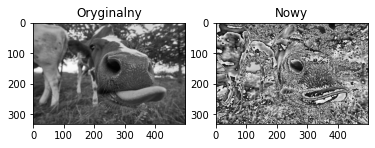

In [49]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img-1.jpg', 0)

c = 5
newImg = img * c
        
compareImages(img, newImg, 'gray')

W przypadku obrazu w odcieniach szarości, piksele nie przechowują informacji o kolorach w formacie RGB (red, green blue) lecz o natężeniu poziomu szarości konkretnego piksela. Wartośći te powinny znaleźć się w zakresie 0-255, więc jeśli wyjdziemy poza ten zakres, w obrazie powstaną artefakty.

#### b) Zmianę dynamiki skali szarości (kontrastu).
Możesz zastosować transformację o postaci T(r) = 1 / (1 + (m / r)^e) gdzie m i e są ustalonymi parametrami przekształcenia (np. m = 0,45, e = 8). Wykreśl T(r), by lepiej uwidocznić wpływ T na kontrast obrazu wyjściowego. Przeprowadź eksperymenty z różnymi wartościami parametrów m i e.

<ipython-input-50-322003b601f9>:10: RuntimeWarning: divide by zero encountered in true_divide
  newImg = 1 / (1 + (m / img)**e)


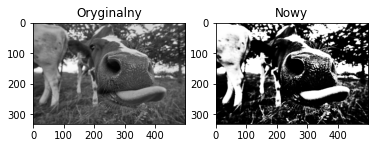

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img-1.jpg', 0)

m = 100
e = 12

newImg = 1 / (1 + (m / img)**e)
    
compareImages(img, newImg, 'gray')

Zmiana dynamiki skali szarośći odbywa się przy pomocy dwóch parametrów. Dla ustawień m=10, e=0.5 obraz ma nieco mniejszy kontrast niż dla m=100, e=0.5. Dla m=100, e=3 widzimy znaczne poprawienie kontrastu obrazu. Stał się ostrzejszy, detale są wyraźniejsze, można wyróżnić każde ździebełko trawy. Wartość 100 dla parametru m daje bardzo dobre pole do manewru dla parametru e. Dla wspomnianej wartośći parametru m, sterując jedynie wartością parametru e, możemy uzyskać obrazy charakteryzujące się bardzo małym kontrastem, np. dla e=0.1, oraz obrazy, które aż przytłaczają obserwatora siłą powstałego kontrastu, np. e=12. Sterowanie kontrastem może przydać się w analizie obrazów, gdyż pozwala uwidocznić szczegóły niezauważalne na pierwszy rzut oka. 

#### c) Korekcję gamma, zdefiniowaną jako s = c · r^γ, gdzie c > 0 i γ > 0 są stałymi we wzorze przekształcenia.

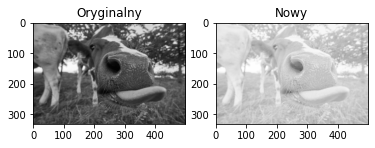

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img-1.jpg', 0)
  
c = 2
gamma = 0.2
        
newImg = c * img**gamma
        
compareImages(img, newImg, 'gray')

Przekształcenie zmienia jasność obrazu.

### Ćwiczenie 7. 
Wypróbuj działanie wyrównywania histogramu na przykładowych
obrazach. By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy
zbyt ciemne i zbyt jasne. Narysować histogramy obrazów przed i po wyrównaniu.

Histogram jest graficznym sposobem przedstawienia rozkładu empirycznego cechy. W przypadku obrazów w odcieniach szarości będzie to natężenie szarośći konkretnego piksela. Wartości bliższe 0 oznaczają piksele ciemniejsze, a bliższe 255 jaśniejsze. Wyrównanie histogramu obrazu sprawia, że ilość próbek ciemnych w danych obrazie jest zbliżona do ilości próbek jasnych, czyli zazwyczaj poprawia kontrast.

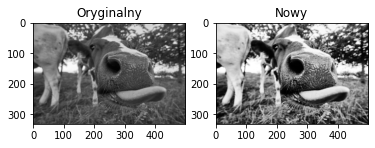

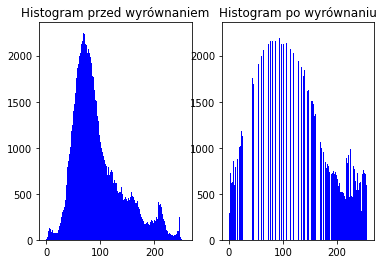

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img-1.jpg', 0)
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

newImg = cv2.equalizeHist(img)

compareImages(img, newImg, 'gray')
compareHistograms(img, newImg)

Z histogramu widzimy, że raczej mamy do czynienia z ciemnym obrazem - wartości w okolicach 80 natężenia zdecydowanie przeważają nad pozostałymi wartościami z całego spektrum. Po wyrównaniu kontrast zdjęcia zostaje zwiększony. Wyraźniejsze stają się różnice między jasnymi oraz ciemnymi pikselami.Spektogram dowodzi, że operacja została przeprowadzona poprawnie, spektrum się ustabilizowało.

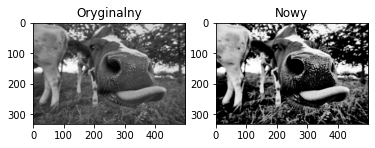

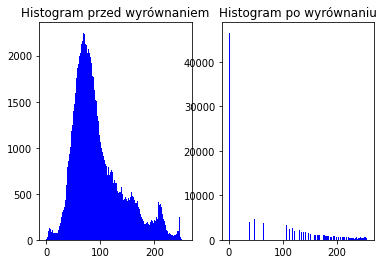

In [53]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

darkImg = cv2.imread('img-dark.jpg',0)
hist, bins = np.histogram(darkImg.flatten(), 256, [0,256])

newImg = cv2.equalizeHist(darkImg)

compareImages(img, newImg, 'gray')
compareHistograms(darkImg, newImg)

W przypadku bardzo ciemnego ekranu próba wyrównania spektrum nie sprawdziła się najelpiej. W obrazie pozostała bardzo dużą ilość ciemnych pikseli.

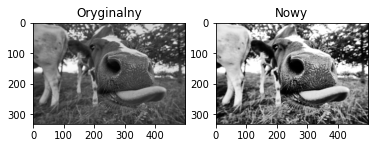

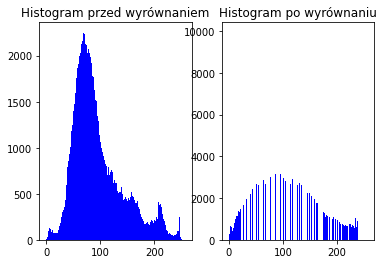

In [54]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

brightImg = cv2.imread('img-light.jpg',0)
hist, bins = np.histogram(brightImg.flatten(), 256, [0, 256])

newImg = cv2.equalizeHist(brightImg)

compareImages(img, newImg, 'gray')
compareHistograms(brightImg, newImg)

### Ćwiczenie 8
Zbadaj skuteczność redukcji szumu typu „sól i pieprz”.

Szum typu "sól i pieprz" często występuje w obrazach cyfrowych. Przyczyną są ostre i nagłe zakłócenia transmisji. Polega na występowaniu ciemnych pikseli w obszarze jasnych i na odwrót - jasnych pikseli na ciemnych tłach, co uzasadnia nazwę "sól i pieprz". Do efektywych metod walki z takim rodzajem szumu należą między innymi filtry medianowe.

#### a) liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski rozmiaru 3 × 3.
Filtr rozmywa obraz, dzięki czemu szum zanika kosztem pogorszenia jakości obrazu. Maska rozmiaru 3x3 nie pozwoliła na całkowitą redukcję szumu. Dopiero przy masce 8x8 zaczął być mniej widoczny, jednak obraz stał się już bardzo rozmyty. Drastycznym przypadkiem jest maska rozmiaru 15x15, w której faktycznie szumu nie widać, jednak obraz jest całkiem nieczytelny.

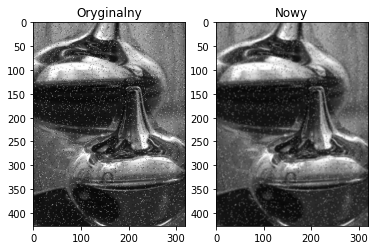

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.png')
newImg = cv2.blur(img, (3, 3))

compareImages(img, newImg)

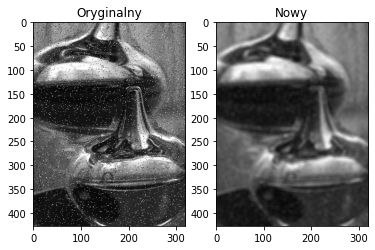

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.png')
newImg = cv2.blur(img, (8, 8))

compareImages(img, newImg)

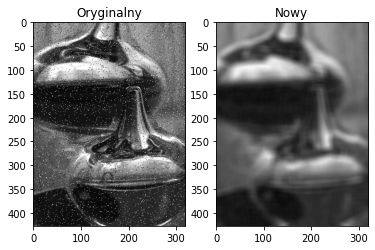

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.png')
newImg = cv2.blur(img, (15, 15))

compareImages(img, newImg)

#### b) nieliniowego filtra medianowego.
Filtr medianowy sprawdził się znacznie lepiej od poprzedniego, wygładza obraz. Oblicza medianę pikseli dookoła centralnego i dokonuje podmiany. Pozwala na zachowanie dobrej jakośći obrazu i pozbycie się niechcianego szumu. Im bardziej zwięszamy wartość rozmycia, tym obraz staje się coraz bardziej "pastelowy".

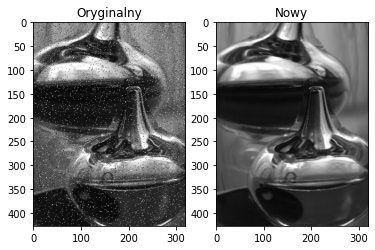

In [58]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.png')
newImg = cv2.medianBlur(img, 3)

compareImages(img, newImg)

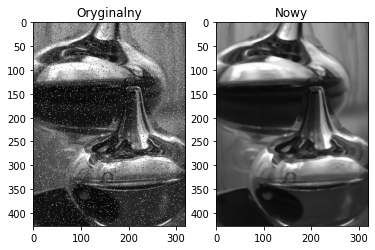

In [59]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.png')
newImg = cv2.medianBlur(img, 5)

compareImages(img, newImg)

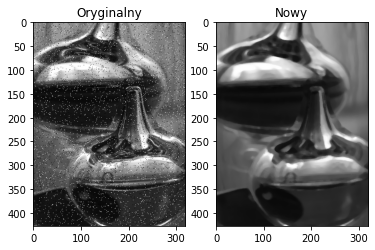

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('noise.png')
newImg = cv2.medianBlur(img, 7)

compareImages(img, newImg)

### Ćwiczenie 9

Zastosuj filtry górnoprzepustowe do wykrywania krawędzi na przykładowych obrazach.

Celem wykrywania krawedzi jest poprawa wizualnej jakośći obrazu, między innymi ostrości, szczegółowości, kontrastu.

#### a) Użyj filtra z maską Sobela do wykrywania krawędzi.
Wyróżniamy dwa typy filtrów z maską Sobela - poziomy oraz pionowy. Poziomy, jak sama nazwa podpowiada, wykrywa krawędzie w poziomie, pionowy natomiast w pionie. Filtr umożliwia aproksymację pochodnych kierunkowych intensywności obrazu w ośmiu kierunkach, co 45°.

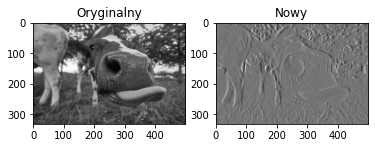

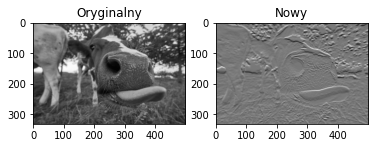

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img-1.jpg', 0)

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

compareImages(img, sobelx, 'gray')
compareImages(img, sobely, 'gray')


#### b) Zaobserwuj działanie Laplasjanu do wyostrzania szczegółów.
Laplasjan, operator Laplace'a, to różniczkowy operator drugiego rzędu służący do wyostrzania szczegółów.

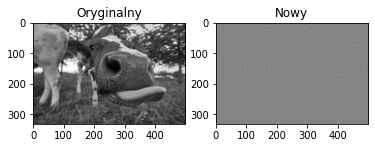

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img-1.jpg', 0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)

compareImages(img, laplacian, 'gray')

### Wnioski
Celem usprawnienia procesu analizy obrazu można wykorzystać różne pakiety, między innymi cv2 (OpenCv), NumPy oraz matplotlib, które dostępne są w środowisku charaktetystycznym dla języka Python. Dostarczają użytkownikowi zestaw niezbędnych narzędzi, np. filtry, struktury danych, operacje na strukturach, czy też rysowanie wykresów. Wszystkie z nich są niezbędne do sprawnej i kompleksowej analizy danego obrazu i wyciągnięcia prawidłowych wniosków koniecznych do dalszej pracy nad określonym problemem. Przetwarzanie obrazu często wiąże się z wyszczególnieniem konkretnych cech kosztem utraty innych, mniej ważnych dla danego problemu.